In [26]:
import pandas as pd
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import re

In [27]:
df = pd.read_csv("video_info_2022_9_14.csv")
df.head()

,Channel,Title,Views,Post-Time
0,T-Series,Tu Banke Hawa - Dhokha: Round D Corner | R. Ma...,754K views,12 hours ago
1,T-Series,Vikram In Action: Vikram Vedha | Saif Ali Khan...,737K views,15 hours ago
2,T-Series,Thank God (Trailer Screening) Ft. Sidharth Mal...,219K views,17 hours ago
3,T-Series,Dhokha: Round D Corner | Dialogue Promo 01: Te...,117K views,1 day ago
4,T-Series,#KatrinaKaif #AkshayKumar - Teri Galliyon Se #...,178K views,1 day ago


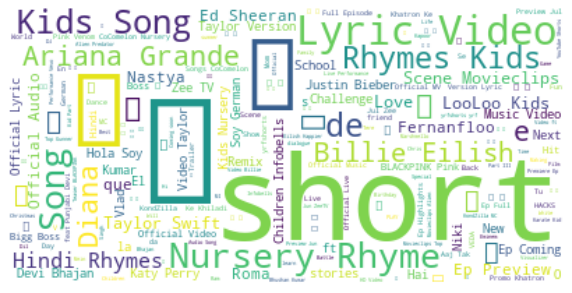

In [28]:
text = " ".join(word for word in df['Title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud.recolor(colormap='viridis', random_state = 17), interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
views_list = []

for value in df['Views'].values:
    

    
    number_result = int(re.search("\d+", value).group())
    
    letter_result = re.search("[K,M,B]", value)
        
        
    if letter_result is not None:   


        if letter_result.group() == "K":
            number_result = number_result * 10**3

        if letter_result.group() =="M":
            number_result = number_result * 10**6

        if letter_result.group() == "B":
            number_result = number_result * 10**9

    views_list.append(number_result)
views_list

[754000,
 737000,
 219000,
 117000,
 178000,
 148000,
 285000,
 8000000,
 7000000,
 191000,
 96000,
 286000,
 15000000,
 258000,
 38000000,
 47000000,
 130000,
 494000,
 8000000,
 335000,
 18000000,
 656000,
 166000,
 34000,
 32000,
 22000,
 49000,
 46000,
 20000,
 399000,
 2000000,
 6000000,
 8000000,
 9000000,
 9000000,
 11000000,
 47000000,
 13000000,
 16000000,
 13000000,
 16000000,
 33000000,
 10000000,
 22000000,
 10000000,
 15000000,
 15000000,
 9000000,
 11000000,
 6000000,
 9000000,
 28000000,
 13000000,
 28000000,
 26000000,
 11000000,
 24000000,
 33000000,
 38000000,
 33000000,
 10000,
 24000,
 47000,
 39000,
 9000,
 133000,
 81000,
 39000,
 19000,
 137000,
 44000,
 29000,
 48000,
 10000,
 36000,
 12000,
 73000,
 22000,
 26000,
 8000,
 38000,
 16000,
 200000,
 8000,
 34000,
 14000,
 46000,
 14000,
 3000,
 16000,
 2000000,
 1000000,
 2000000,
 1000000,
 2000000,
 1000000,
 1000000,
 2000000,
 2000000,
 3000000,
 3000000,
 3000000,
 2000000,
 4000000,
 3000000,
 5000000,
 3000

In [30]:
df['Views_Numeric'] = views_list
df.head()

,Channel,Title,Views,Post-Time,Views_Numeric
0,T-Series,Tu Banke Hawa - Dhokha: Round D Corner | R. Ma...,754K views,12 hours ago,754000
1,T-Series,Vikram In Action: Vikram Vedha | Saif Ali Khan...,737K views,15 hours ago,737000
2,T-Series,Thank God (Trailer Screening) Ft. Sidharth Mal...,219K views,17 hours ago,219000
3,T-Series,Dhokha: Round D Corner | Dialogue Promo 01: Te...,117K views,1 day ago,117000
4,T-Series,#KatrinaKaif #AkshayKumar - Teri Galliyon Se #...,178K views,1 day ago,178000


In [31]:
df.isnull().sum()

Channel          0
Title            0
Views            0
Post-Time        0
Views_Numeric    0
dtype: int64

In [49]:
timing = []

for value in df['Post-Time'].values:
    
    number_result = int(re.search('\d+',value).group())
    
    try:
        word_result = re.search('(second|minute|hour|day|week|month|year)',value).group()
        
        print(value)
        print("Number Result:", number_result)
        print("Word Result:", word_result)
        
        if word_result == 'second':
            number_result = 0
        
        if word_result == "minute":
            number_result = number_result / 24 / 60
        
        if word_result == "hour":
            number_result = number_result / 24
        
        if word_result == "week":
            number_result = number_result * 7
            
        if word_result == "month":
            number_result = number_result * 7 * 4
        
        if word_result == "year":
            number_result = number_result * 7 * 4 * 12
    
    except AttributeError:
        print(f"Expceted Error for value: {value}. Word result: {word_result}. Number result: {number_result} Moving on...")
        timing.append(0)
        
    timing.append(number_result)
    
timing 

12 hours ago
Number Result: 12
Word Result: hour
15 hours ago
Number Result: 15
Word Result: hour
17 hours ago
Number Result: 17
Word Result: hour
1 day ago
Number Result: 1
Word Result: day
1 day ago
Number Result: 1
Word Result: day
1 day ago
Number Result: 1
Word Result: day
2 days ago
Number Result: 2
Word Result: day
2 days ago
Number Result: 2
Word Result: day
2 days ago
Number Result: 2
Word Result: day
3 days ago
Number Result: 3
Word Result: day
3 days ago
Number Result: 3
Word Result: day
4 days ago
Number Result: 4
Word Result: day
4 days ago
Number Result: 4
Word Result: day
5 days ago
Number Result: 5
Word Result: day
5 days ago
Number Result: 5
Word Result: day
6 days ago
Number Result: 6
Word Result: day
6 days ago
Number Result: 6
Word Result: day
7 days ago
Number Result: 7
Word Result: day
7 days ago
Number Result: 7
Word Result: day
9 days ago
Number Result: 9
Word Result: day
9 days ago
Number Result: 9
Word Result: day
10 days ago
Number Result: 10
Word Result: day

Word Result: day
12 days ago
Number Result: 12
Word Result: day
12 days ago
Number Result: 12
Word Result: day
12 days ago
Number Result: 12
Word Result: day
12 days ago
Number Result: 12
Word Result: day
2 weeks ago
Number Result: 2
Word Result: week
2 weeks ago
Number Result: 2
Word Result: week
3 weeks ago
Number Result: 3
Word Result: week
3 weeks ago
Number Result: 3
Word Result: week
3 weeks ago
Number Result: 3
Word Result: week
3 weeks ago
Number Result: 3
Word Result: week
4 weeks ago
Number Result: 4
Word Result: week
4 weeks ago
Number Result: 4
Word Result: week
4 weeks ago
Number Result: 4
Word Result: week
4 weeks ago
Number Result: 4
Word Result: week
4 weeks ago
Number Result: 4
Word Result: week
1 month ago
Number Result: 1
Word Result: month
1 month ago
Number Result: 1
Word Result: month
1 month ago
Number Result: 1
Word Result: month
1 month ago
Number Result: 1
Word Result: month
1 month ago
Number Result: 1
Word Result: month
2 months ago
Number Result: 2
Word Res

Number Result: 2
Word Result: month
8 months ago
Number Result: 8
Word Result: month
10 months ago
Number Result: 10
Word Result: month
11 months ago
Number Result: 11
Word Result: month
11 months ago
Number Result: 11
Word Result: month
11 months ago
Number Result: 11
Word Result: month
1 year ago
Number Result: 1
Word Result: year
1 year ago
Number Result: 1
Word Result: year
1 year ago
Number Result: 1
Word Result: year
1 year ago
Number Result: 1
Word Result: year
2 years ago
Number Result: 2
Word Result: year
2 years ago
Number Result: 2
Word Result: year
2 years ago
Number Result: 2
Word Result: year
2 years ago
Number Result: 2
Word Result: year
2 years ago
Number Result: 2
Word Result: year
2 years ago
Number Result: 2
Word Result: year
2 years ago
Number Result: 2
Word Result: year
2 years ago
Number Result: 2
Word Result: year
2 years ago
Number Result: 2
Word Result: year
2 years ago
Number Result: 2
Word Result: year
2 years ago
Number Result: 2
Word Result: year
Streamed 4

Number Result: 8
Word Result: month
9 months ago
Number Result: 9
Word Result: month
9 months ago
Number Result: 9
Word Result: month
9 months ago
Number Result: 9
Word Result: month
10 months ago
Number Result: 10
Word Result: month
10 months ago
Number Result: 10
Word Result: month
10 months ago
Number Result: 10
Word Result: month
11 months ago
Number Result: 11
Word Result: month
11 months ago
Number Result: 11
Word Result: month
11 months ago
Number Result: 11
Word Result: month
1 year ago
Number Result: 1
Word Result: year
1 year ago
Number Result: 1
Word Result: year
1 year ago
Number Result: 1
Word Result: year
1 year ago
Number Result: 1
Word Result: year
1 year ago
Number Result: 1
Word Result: year
1 year ago
Number Result: 1
Word Result: year
1 year ago
Number Result: 1
Word Result: year
1 year ago
Number Result: 1
Word Result: year
1 year ago
Number Result: 1
Word Result: year
1 year ago
Number Result: 1
Word Result: year
1 year ago
Number Result: 1
Word Result: year
1 yea

[0.5,
 0.625,
 0.7083333333333334,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 4,
 4,
 5,
 5,
 6,
 6,
 7,
 7,
 9,
 9,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 1,
 4,
 8,
 11,
 14,
 14,
 21,
 21,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 84,
 0.25,
 0.2916666666666667,
 0.2916666666666667,
 0.2916666666666667,
 0.2916666666666667,
 0.2916666666666667,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.4166666666666667,
 0.4166666666666667,
 0.4583333333333333,
 0.4583333333333333,
 0.4583333333333333,
 0.4583333333333333,
 0.4583333333333333,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5416666666666666,
 0.5416666666666666,
 0.5416666666666666,
 0.5,
 10,
 14,
 14,
 21,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 112,
 11,
 21,
 28,
 28,
 28,
 56,
 84,
 140,
 140,
 196,
 224,

In [50]:
df["Post-Time-Numeric (Days)"] = timing

In [51]:
df.head()

,Channel,Title,Views,Post-Time,Views_Numeric,Post-Time-Numeric (Days),Number of Characters
0,T-Series,Tu Banke Hawa - Dhokha: Round D Corner | R. Ma...,754K views,12 hours ago,754000,0.500000,100
1,T-Series,Vikram In Action: Vikram Vedha | Saif Ali Khan...,737K views,15 hours ago,737000,0.625000,95
2,T-Series,Thank God (Trailer Screening) Ft. Sidharth Mal...,219K views,17 hours ago,219000,0.708333,81
3,T-Series,Dhokha: Round D Corner | Dialogue Promo 01: Te...,117K views,1 day ago,117000,1.000000,100
4,T-Series,#KatrinaKaif #AkshayKumar - Teri Galliyon Se #...,178K views,1 day ago,178000,1.000000,63


In [52]:
df.shape

(1288, 7)

In [53]:
df['Number of Characters'] = list(map(len,list(df['Title'].values)))

In [54]:
df = df[df['Number of Characters'] != 0]
df.head()

,Channel,Title,Views,Post-Time,Views_Numeric,Post-Time-Numeric (Days),Number of Characters
0,T-Series,Tu Banke Hawa - Dhokha: Round D Corner | R. Ma...,754K views,12 hours ago,754000,0.500000,100
1,T-Series,Vikram In Action: Vikram Vedha | Saif Ali Khan...,737K views,15 hours ago,737000,0.625000,95
2,T-Series,Thank God (Trailer Screening) Ft. Sidharth Mal...,219K views,17 hours ago,219000,0.708333,81
3,T-Series,Dhokha: Round D Corner | Dialogue Promo 01: Te...,117K views,1 day ago,117000,1.000000,100
4,T-Series,#KatrinaKaif #AkshayKumar - Teri Galliyon Se #...,178K views,1 day ago,178000,1.000000,63


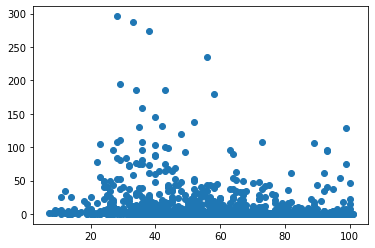

In [56]:
plt.scatter(df['Number of Characters'].values, df['Views_Numeric'].values / pow(10,6))


In [57]:
char_list = list(df['Number of Characters'].values)
views_list = list(df['Views_Numeric'].values)

In [58]:
from scipy.stats import linregress

r^2 value: 0.03695074337768313
p value: 3.475571257591415e-12


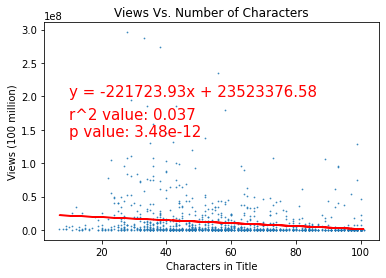

In [113]:

(slope, intercept, r_value, p_value, std_err) = linregress(char_list, views_list)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in char_list]
plt.scatter(char_list,views_list, s = 0.6, alpha = 0.8)
plt.plot(char_list,regress_values,"r")
plt.annotate(line_eq, (10,200000000), fontsize=15, color="red")
plt.annotate(f"r^2 value: {round(pow(r_value,2),3)}\np value: {'{:0.2e}'.format(p_value)}", (10,140000000), fontsize = 15, color = 'red')
print(f"r^2 value: {pow(r_value,2)}\np value: {p_value}")
plt.title("Views Vs. Number of Characters")
plt.xlabel("Characters in Title")
plt.ylabel("Views (100 million)")
plt.show()

In [64]:
time_list = df['Post-Time'].values.tolist()
print(time_list)

['12 hours ago', '15 hours ago', '17 hours ago', '1 day ago', '1 day ago', '1 day ago', '2 days ago', '2 days ago', '2 days ago', '3 days ago', '3 days ago', '4 days ago', '4 days ago', '5 days ago', '5 days ago', '6 days ago', '6 days ago', '7 days ago', '7 days ago', '9 days ago', '9 days ago', '10 days ago', '10 days ago', '11 days ago', '11 days ago', '11 days ago', '11 days ago', '11 days ago', '11 days ago', '11 days ago', '1 day ago', '4 days ago', '8 days ago', '11 days ago', '2 weeks ago', '2 weeks ago', '3 weeks ago', '3 weeks ago', '4 weeks ago', '1 month ago', '1 month ago', '1 month ago', '1 month ago', '1 month ago', '1 month ago', '1 month ago', '1 month ago', '1 month ago', '1 month ago', '1 month ago', '2 months ago', '2 months ago', '2 months ago', '2 months ago', '2 months ago', '2 months ago', '2 months ago', '2 months ago', '2 months ago', '3 months ago', '6 hours ago', '7 hours ago', '7 hours ago', '7 hours ago', '7 hours ago', '7 hours ago', '8 hours ago', '8 hou

In [65]:
time_list_numeric = df['Post-Time-Numeric (Days)'].values.tolist()
print(time_list_numeric)

[0.5, 0.625, 0.7083333333333334, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0, 6.0, 7.0, 7.0, 9.0, 9.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 1.0, 4.0, 8.0, 11.0, 14.0, 14.0, 21.0, 21.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 84.0, 0.25, 0.2916666666666667, 0.2916666666666667, 0.2916666666666667, 0.2916666666666667, 0.2916666666666667, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.375, 0.375, 0.375, 0.375, 0.375, 0.4166666666666667, 0.4166666666666667, 0.4583333333333333, 0.4583333333333333, 0.4583333333333333, 0.4583333333333333, 0.4583333333333333, 0.5, 0.5, 0.5, 0.5, 0.5416666666666666, 0.5416666666666666, 0.5416666666666666, 0.5, 10.0, 14.0, 14.0, 21.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0, 112.0, 11.0,

r value: 0.07980146710036942
p value: 4.658572330378934e-25


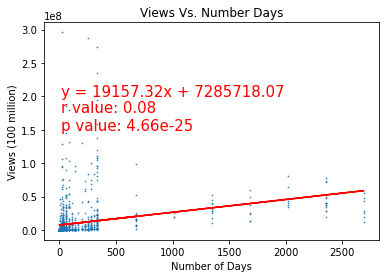

In [114]:
(slope, intercept, r_value, p_value, std_err) = linregress(time_list_numeric, views_list)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in time_list_numeric]
plt.scatter(time_list_numeric,views_list, s = 0.6, alpha = 0.8)
plt.plot(time_list_numeric, regress_values,"r")
plt.annotate(line_eq, (10,pow(10,8)*2), fontsize=15, color="red")
plt.annotate(f"r value: {round(pow(r_value,2),3)}\np value: {'{:0.2e}'.format(p_value)}", (10,pow(10,8)*1.5), fontsize = 15, color = 'red')
print(f"r value: {pow(r_value,2)}\np value: {p_value}")
plt.title("Views Vs. Number Days")
plt.xlabel("Number of Days")
plt.ylabel("Views (100 million)")
plt.show()

In [81]:
df['Views per Day'] = df['Views_Numeric'] / df['Post-Time-Numeric (Days)']

df.head()

,Channel,Title,Views,Post-Time,Views_Numeric,Post-Time-Numeric (Days),Number of Characters,Views per Day
0,T-Series,Tu Banke Hawa - Dhokha: Round D Corner | R. Ma...,754K views,12 hours ago,754000,0.500000,100,1.508000e+06
1,T-Series,Vikram In Action: Vikram Vedha | Saif Ali Khan...,737K views,15 hours ago,737000,0.625000,95,1.179200e+06
2,T-Series,Thank God (Trailer Screening) Ft. Sidharth Mal...,219K views,17 hours ago,219000,0.708333,81,3.091765e+05
3,T-Series,Dhokha: Round D Corner | Dialogue Promo 01: Te...,117K views,1 day ago,117000,1.000000,100,1.170000e+05
4,T-Series,#KatrinaKaif #AkshayKumar - Teri Galliyon Se #...,178K views,1 day ago,178000,1.000000,63,1.780000e+05


In [90]:
ordered_df = df.groupby('Channel').mean().sort_values('Views per Day', ascending = False)
ordered_df.head()

,Views_Numeric,Post-Time-Numeric (Days),Number of Characters,Views per Day
Channel,,,,
Blackpink,3.753333e+07,22.433333,54.666667,2.191667e+06
T-Series,4.888400e+06,5.861111,91.966667,1.129774e+06
MrBeast,1.008667e+08,230.666667,35.333333,7.583808e+05
Kids Diana Show,3.713333e+07,44.466667,52.400000,7.533730e+05
Cocomelon - Nursery Rhymes,1.746667e+07,33.933333,68.600000,6.677489e+05


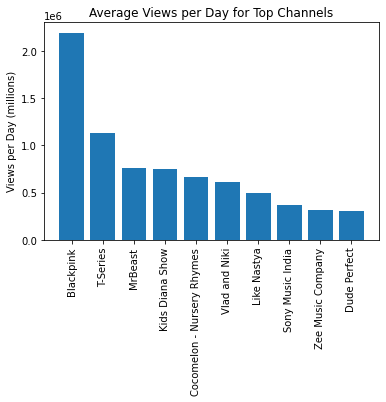

In [112]:
fig = plt.bar( ordered_df.index.values[:10] ,ordered_df['Views per Day'].values[:10])
plt.xticks(rotation= 90)
plt.title("Average Views per Day for Top Channels")
plt.ylabel("Views per Day (millions)")
plt.show()
